In [54]:
#Toma foto
def captura(scale):
    camera = cv2.VideoCapture(0)
    
    for i in range(5):                           #Tiempo de apertura de la camara 
        return_value, image = camera.read()    
    cv2.imwrite('captura.png', image)
    zoom(image,scale)
    del(camera)

In [55]:
#Zoom 
def zoom(image,scale):
    height, width, channels = image.shape
    centerX,centerY=int(height/2),int(width/2)
    radiusX,radiusY= int(scale*height/100),int(scale*width/100)

    minX,maxX=centerX-radiusX,centerX+radiusX
    minY,maxY=centerY-radiusY,centerY+radiusY

    cropped = image[minX:maxX, minY:maxY]
    imagen_zoom = cv2.resize(cropped, (width, height)) 
    imagen_gris=grises(imagen_zoom)
    cv2.imwrite('capturazoomgris.png', imagen_gris)
    

In [56]:
#Escala de grises 
def grises(imagen_zoom):
    imagen_gris = cv2.cvtColor(imagen_zoom, cv2.COLOR_BGR2GRAY)
    return imagen_gris

In [57]:
#ORB
def ORB_nano():
    img1=cv2.imread('/home/jetson/Vision Artificial/capturazoomgris.png')
    img2=cv2.imread('/home/jetson/Vision Artificial/capturabase.png')
    #ORB descriptor
    orb = cv2.ORB_create()
    #Encuentra los descriptores con ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    #Encuentra los descriptores comunes entre ambas imagenes
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    #Distancia entre descriptores tolerada
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    #impresion del resultado
    matchesorb = (len(good))
    PC=0
    NC=0
    if matchesorb>=10:
        PC=1
    else:
        NC=1
    
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imwrite('comparacion.png', img3)
    plt.imshow(img3,aspect="auto"),plt.show()
    print('NC=%d y PC=%d,'%(NC,PC))

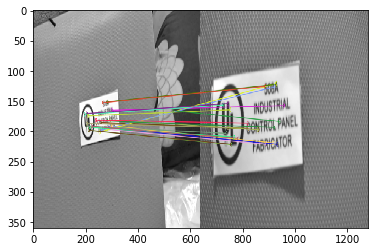

NC=0 y PC=1,


In [61]:
captura(scale=30)
ORB_nano()
